In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:32<00:00, 35.6MB/s]
100% 2.29G/2.29G [00:32<00:00, 75.1MB/s]


In [ ]:
from zipfile import ZipFile
filename = 'chest-xray-pneumonia.zip'

with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print("done")


done


In [ ]:
!git clone https://github.com/ieee8023/covid-chestxray-dataset


Cloning into 'covid-chestxray-dataset'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 3614 (delta 7), reused 11 (delta 5), pack-reused 3599
Receiving objects: 100% (3614/3614), 633.00 MiB | 43.72 MiB/s, done.
Resolving deltas: 100% (1430/1430), done.
Checking out files: 100% (1173/1173), done.


In [ ]:

import pandas as pd
import os
import shutil
import random
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from pathlib import Path
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools

In [ ]:

#Create the data for positive samples 

FILE_PATH = "/content/covid-chestxray-dataset/metadata.csv"
IMAGE_PATH = "/content/covid-chestxray-dataset/images"

In [ ]:
df = pd.read_csv(FILE_PATH)
print(df.shape)

(950, 30)


In [ ]:
df.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [ ]:
TARGET_DIR = "/content/covid-chestxray-dataset/dataset/train/covid"

if not os.path.exists(TARGET_DIR):
    os.mkdir(TARGET_DIR)
    print("Covid FOlder Created")

Covid FOlder Created


In [ ]:
#Copy COVID-19 images with view point PA from Downloaded directory to Target Directory
cnt = 0
for(i,row) in df.iterrows():
    if row["finding"] == "Pneumonia/Viral/COVID-19" and row["view"] =="PA":
        filename = row["filename"]
        image_path = os.path.join(IMAGE_PATH,filename) #IMAGE_PATH + filename
        image_copy_path = os.path.join(TARGET_DIR,filename) #TARGET_DIR + filename
        shutil.copy2(image_path,image_copy_path) #Copy From IMAGE_PATH to TARGET_DIrectory
        print("Moving Image",cnt)
        cnt+=1
print(cnt)

Moving Image 0
Moving Image 1
Moving Image 2
Moving Image 3
Moving Image 4
Moving Image 5
Moving Image 6
Moving Image 7
Moving Image 8
Moving Image 9
Moving Image 10
Moving Image 11
Moving Image 12
Moving Image 13
Moving Image 14
Moving Image 15
Moving Image 16
Moving Image 17
Moving Image 18
Moving Image 19
Moving Image 20
Moving Image 21
Moving Image 22
Moving Image 23
Moving Image 24
Moving Image 25
Moving Image 26
Moving Image 27
Moving Image 28
Moving Image 29
Moving Image 30
Moving Image 31
Moving Image 32
Moving Image 33
Moving Image 34
Moving Image 35
Moving Image 36
Moving Image 37
Moving Image 38
Moving Image 39
Moving Image 40
Moving Image 41
Moving Image 42
Moving Image 43
Moving Image 44
Moving Image 45
Moving Image 46
Moving Image 47
Moving Image 48
Moving Image 49
Moving Image 50
Moving Image 51
Moving Image 52
Moving Image 53
Moving Image 54
Moving Image 55
Moving Image 56
Moving Image 57
Moving Image 58
Moving Image 59
Moving Image 60
Moving Image 61
Moving Image 62
Mo

In [ ]:
# Sampling of Images from Kaggle Data,As we have 143 around covid images so we will have 143 around normal images of xray


KAGGLE_FILE_PATH = "/content/chest_xray/train/NORMAL/"
TARGET_NORMAL_DIR = "/content/covid-chestxray-dataset/dataset/train/normal"
if not os.path.exists(TARGET_NORMAL_DIR):
    os.mkdir(TARGET_NORMAL_DIR)
    print("Normal Folder Created")
    
image_names = os.listdir(KAGGLE_FILE_PATH) #COntains list of all image names
# images_names
random.shuffle(image_names) #it will randomly shuffle names in list

for i in range(196):
    image_name = image_names[i]
    image_path = os.path.join(KAGGLE_FILE_PATH,image_name)
    
    target_path = os.path.join(TARGET_NORMAL_DIR,image_name)
    shutil.copy2(image_path,target_path)
#     print("Moved",i)

In [ ]:
TRAIN_PATH = "/content/covid-chestxray-dataset/dataset/train"
VAL_PATH = "/content/covid-chestxray-dataset/dataset/val"

In [ ]:
# Sampling of Images from val data


pred = "/content/dataset/prediction"
    
image_names = os.listdir(IMAGE_PATH) #COntains list of all image names
# images_names
random.shuffle(image_names) #it will randomly shuffle names in list

for i in range(40):
    image_name = image_names[i]
    image_path = os.path.join(IMAGE_PATH ,image_name)
    
    target_path = os.path.join(pred,image_name)
    shutil.move(image_path,target_path)
    print("Moved",i)


Moved 0
Moved 1
Moved 2
Moved 3
Moved 4
Moved 5
Moved 6
Moved 7
Moved 8
Moved 9
Moved 10
Moved 11
Moved 12
Moved 13
Moved 14
Moved 15
Moved 16
Moved 17
Moved 18
Moved 19
Moved 20
Moved 21
Moved 22
Moved 23
Moved 24
Moved 25
Moved 26
Moved 27
Moved 28
Moved 29
Moved 30
Moved 31
Moved 32
Moved 33
Moved 34
Moved 35
Moved 36
Moved 37
Moved 38
Moved 39


In [ ]:
# Sampling of Images from val data

cov_norm = "/content/covid-chestxray-dataset/dataset/train/normal"
val_norm = "/content/covid-chestxray-dataset/dataset/val/normal"
    
image_names = os.listdir(cov_norm) #COntains list of all image names
# images_names
random.shuffle(image_names) #it will randomly shuffle names in list

for i in range(40):
    image_name = image_names[i]
    image_path = os.path.join(cov_norm,image_name)
    
    target_path = os.path.join(val_norm,image_name)
    shutil.move(image_path,target_path)
    print("Moved",i)

Moved 0
Moved 1
Moved 2
Moved 3
Moved 4
Moved 5
Moved 6
Moved 7
Moved 8
Moved 9
Moved 10
Moved 11
Moved 12
Moved 13
Moved 14
Moved 15
Moved 16
Moved 17
Moved 18
Moved 19
Moved 20
Moved 21
Moved 22
Moved 23
Moved 24
Moved 25
Moved 26
Moved 27
Moved 28
Moved 29
Moved 30
Moved 31
Moved 32
Moved 33
Moved 34
Moved 35
Moved 36
Moved 37
Moved 38
Moved 39


In [ ]:
# Sampling of Images from val data

cov_norm = "/content/covid-chestxray-dataset/dataset/train/covid"
val_norm = "/content/covid-chestxray-dataset/dataset/val/covid"
    
image_names = os.listdir(cov_norm) #COntains list of all image names
# images_names
random.shuffle(image_names) #it will randomly shuffle names in list

for i in range(40):
    image_name = image_names[i]
    image_path = os.path.join(cov_norm,image_name)
    
    target_path = os.path.join(val_norm,image_name)
    shutil.move(image_path,target_path)
    print("Moved",i)

Moved 0
Moved 1
Moved 2
Moved 3
Moved 4
Moved 5
Moved 6
Moved 7
Moved 8
Moved 9
Moved 10
Moved 11
Moved 12
Moved 13
Moved 14
Moved 15
Moved 16
Moved 17
Moved 18
Moved 19
Moved 20
Moved 21
Moved 22
Moved 23
Moved 24
Moved 25
Moved 26
Moved 27
Moved 28
Moved 29
Moved 30
Moved 31
Moved 32
Moved 33
Moved 34
Moved 35
Moved 36
Moved 37
Moved 38
Moved 39


In [ ]:
#building cnn
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [ ]:
# Data Augmentation
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = image.ImageDataGenerator(rescale = 1./255)

In [ ]:
image_path = '/content/covid-chestxray-dataset/dataset/train/normal'
    
target_path = '/content/dataset/train'
shutil.move(image_path,target_path)
print("copied")

copied


In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/dataset/train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 312 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'covid': 0, 'normal': 1}

In [ ]:
test_generator = test_dataset.flow_from_directory(
    '/content/dataset/val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 80 images belonging to 2 classes.


In [ ]:
test_generator.class_indices

{'covid': 0, 'normal': 1}

In [ ]:
output = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = test_generator,
    validation_steps = 2
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
8/8 [==============================] - 10s 1s/step - loss: 0.8493 - accuracy: 0.4879 - val_loss: 0.6925 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 10s 1s/step - loss: 0.6892 - accuracy: 0.5685 - val_loss: 0.6836 - val_accuracy: 0.9375
Epoch 3/10
8/8 [==============================] - 10s 1s/step - loss: 0.6138 - accuracy: 0.6613 - val_loss: 0.5187 - val_accuracy: 0.8281
Epoch 4/10
8/8 [==============================] - 10s 1s/step - loss: 0.5107 - accuracy: 0.7661 - val_loss: 0.3865 - val_accuracy: 0.9531
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 0.3522 - accuracy: 0.8548 - val_loss: 0.2009 - val_accuracy: 0.9844
Epoch 6/10
8/8 [==============================] - 10s 1s/step - loss: 0.3107 - accuracy: 0.8831 - val_loss: 0.1579 - val_accuracy: 0.9688
Epoch 7/10
8/8 [==============================] - 10s 1s/step - loss: 0.2305 - accuracy: 0.9073 

In [ ]:
model.save("Detection_Covid_19_xray.h5")

In [ ]:
model.evaluate_generator(train_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.09227413684129715, 0.9615384340286255]

In [ ]:
model.evaluate_generator(train_generator)

[0.09969457983970642, 0.9647436141967773]

In [ ]:
model = load_model("Detection_Covid_19_xray.h5")

In [ ]:
train_generator.class_indices

{'covid': 0, 'normal': 1}

In [ ]:
# confusion Matrix
y_actual = []
y_test = []

In [ ]:
os.listdir('/content/dataset/val/normal')

['IM-0480-0001.jpeg',
 'NORMAL2-IM-0554-0001.jpeg',
 'NORMAL2-IM-1170-0001.jpeg',
 'IM-0203-0001.jpeg',
 'NORMAL2-IM-0669-0001.jpeg',
 'IM-0681-0001.jpeg',
 'IM-0325-0001.jpeg',
 'IM-0740-0001.jpeg',
 'NORMAL2-IM-0450-0001.jpeg',
 'NORMAL2-IM-0599-0001.jpeg',
 'IM-0527-0001.jpeg',
 'NORMAL2-IM-1252-0001.jpeg',
 'IM-0350-0001.jpeg',
 'NORMAL2-IM-0475-0001.jpeg',
 'NORMAL2-IM-1244-0001.jpeg',
 'NORMAL2-IM-1037-0001.jpeg',
 'NORMAL2-IM-0678-0001.jpeg',
 'IM-0629-0001-0003.jpeg',
 'NORMAL2-IM-0842-0001.jpeg',
 'IM-0304-0001.jpeg',
 'IM-0490-0001.jpeg',
 'IM-0268-0001.jpeg',
 'IM-0227-0001.jpeg',
 'IM-0487-0001.jpeg',
 'NORMAL2-IM-0651-0004.jpeg',
 'NORMAL2-IM-1191-0001.jpeg',
 'IM-0522-0001.jpeg',
 'NORMAL2-IM-0579-0001.jpeg',
 'IM-0207-0001.jpeg',
 'IM-0143-0001.jpeg',
 'NORMAL2-IM-0667-0001.jpeg',
 'NORMAL2-IM-1178-0001.jpeg',
 'IM-0643-0001.jpeg',
 'NORMAL2-IM-1123-0001.jpeg',
 'IM-0400-0001.jpeg',
 'IM-0525-0001-0001.jpeg',
 'NORMAL2-IM-0682-0001.jpeg',
 'NORMAL2-IM-1277-0001-0001.jpeg

In [ ]:

for i in os.listdir("/content/dataset/val/normal"):
  img = image.load_img("/content/dataset/val/normal/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
for i in os.listdir("/content/dataset/val/covid/"):
  img = image.load_img("/content/dataset/val/covid/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [ ]:
cm = confusion_matrix(y_actual,y_test)
cm

array([[39,  1],
       [ 4, 36]])

In [ ]:
class_names = ["Covid-19","Normal"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[39  1]
 [ 4 36]]


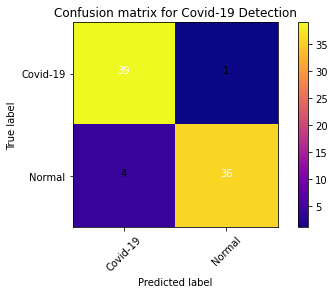

In [ ]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix for Covid-19 Detection',cmap="plasma")

This Xray Image is of positive covid-19 patient
Prediction Of Our Model :  Negative for Covid-19


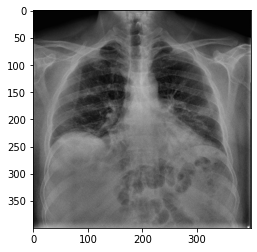

In [ ]:
#Predictions from X-Ray Images
import cv2
from keras.preprocessing import image
xtest_image = image.load_img('/content/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
results = model.predict_classes(xtest_image)
# training_set.class_indices
imggg = cv2.imread('/content/dataset/train/covid/0a7faa2a.jpg')
print("This Xray Image is of positive covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

In [ ]:
!git add .

^C
